In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def NormalizeData(data):
    '''Normalizes data to [0-1] range'''
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [3]:
#Load sensor data
mouse = []
mouse.append(pd.read_csv(r"C:\Users\neurogears\Documents\git\CricketHuntVR\src\Notebooks\Mouse_PD_Latency\mouseXY_Mouse1_test2022-03-29T13_57_56.csv", names=['X', 'Y', 'Time'], header=None))
mouse.append(pd.read_csv(r"C:\Users\neurogears\Documents\git\CricketHuntVR\src\Notebooks\Mouse_PD_Latency\mouseXY_Mouse2_test2022-03-29T13_57_56.csv", names=['X', 'Y', 'Time'], header=None))
photodiode = pd.read_csv(r"C:\Users\neurogears\Documents\git\CricketHuntVR\src\Notebooks\Mouse_PD_Latency\photodiode_test2022-03-29T13_57_56.csv", names=['Time', 'Lum'], header=None)

In [4]:
#Calculate displacement
mouse[0]["Displacement"] = np.sqrt(np.diff(mouse[0]["X"], prepend= 0)**2 + np.diff(mouse[0]["Y"], prepend= 0)**2 )
mouse[1]["Displacement"] = np.sqrt(np.diff(mouse[1]["X"], prepend= 0)**2 + np.diff(mouse[1]["Y"], prepend= 0)**2 )

#Zero the time axis
mouse[0]["Time"] = mouse[0]["Time"] - photodiode["Time"][0]
mouse[1]["Time"] = mouse[1]["Time"]- photodiode["Time"][0]
photodiode["Time"] = photodiode["Time"] - photodiode["Time"][0]

#Convert to milliseconds
mouse[0]["Time"] = mouse[0]["Time"] * 1000
mouse[1]["Time"] = mouse[1]["Time"] * 1000
photodiode["Time"] = photodiode["Time"] * 1000
print(photodiode["Time"][1000] - photodiode["Time"][1001])



-0.9920000011334196


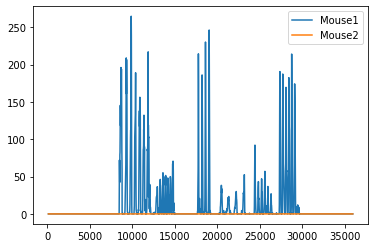

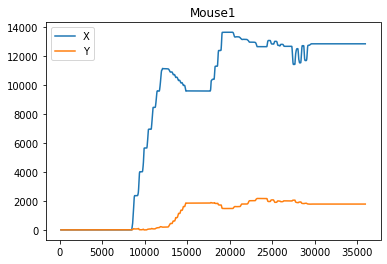

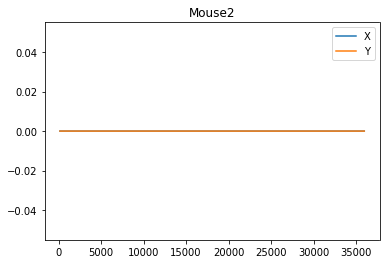

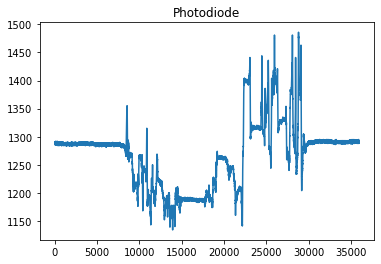

In [9]:
plt.figure()
plt.plot( mouse[0]["Time"], mouse[0]["Displacement"], label= "Mouse1")
plt.plot(mouse[1]["Time"], mouse[1]["Displacement"], label = "Mouse2")
plt.legend()
plt.show()

plt.figure()
idx = 0
plt.plot(mouse[idx]["Time"], mouse[idx]["X"], label = "X")
plt.plot(mouse[idx]["Time"], mouse[idx]["Y"], label = "Y")
plt.legend()
plt.title("Mouse1")

plt.show()


plt.figure()
idx = 1
plt.plot(mouse[idx]["Time"], mouse[idx]["X"], label = "X")
plt.plot(mouse[idx]["Time"], mouse[idx]["Y"], label = "Y")
plt.legend()
plt.title("Mouse2")
plt.show()


plt.figure()
plt.plot(photodiode["Time"], photodiode["Lum"])
plt.title("Photodiode")

plt.show()



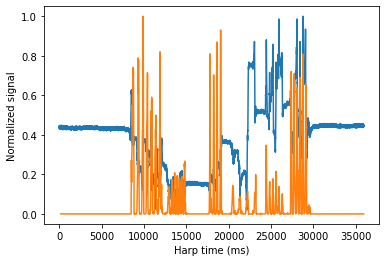

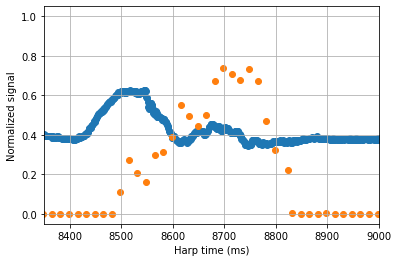

In [11]:
plt.figure()
plt.plot(photodiode["Time"], NormalizeData(photodiode["Lum"]), label = "Photodiode")
plt.plot(mouse[0]["Time"], NormalizeData(mouse[0]["Displacement"]), label = "Mouse1")
plt.plot(mouse[1]["Time"], NormalizeData(mouse[1]["Displacement"]),  label = "Mouse2")
plt.ylabel("Normalized signal")
plt.xlabel("Harp time (ms)")
plt.show()

plt.figure()
plt.scatter(photodiode["Time"], NormalizeData(photodiode["Lum"]), label = "Photodiode")
plt.scatter(mouse[0]["Time"], NormalizeData(mouse[0]["Displacement"]), label = "Mouse1")
plt.scatter(mouse[1]["Time"], NormalizeData(mouse[1]["Displacement"]),  label = "Mouse2")
plt.xlim((8350,9000))
plt.grid()
plt.ylabel("Normalized signal")
plt.xlabel("Harp time (ms)")
plt.show()